In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from tslearn.svm import TimeSeriesSVR

In [2]:
TRAIN_TEST_SPLIT = 0.95

In [3]:
labels = ['PM2.5_pi', 'PM10_pi']

In [4]:
data = pd.read_csv('1h_5.csv')
data.dropna(inplace=True)
data.shape

(1080, 35)

In [5]:
data = pd.read_csv('30min_6.csv')
data.dropna(inplace=True)
data.shape

(2155, 35)

/home/rwanner/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


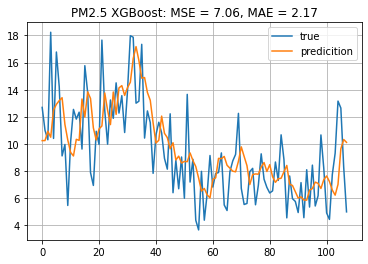

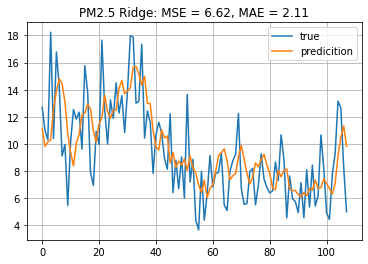

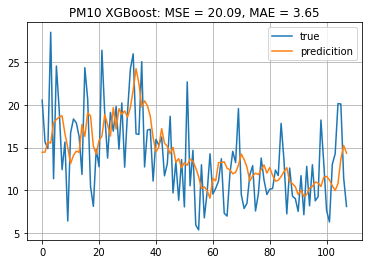

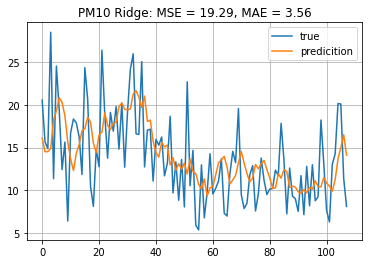

/home/rwanner/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


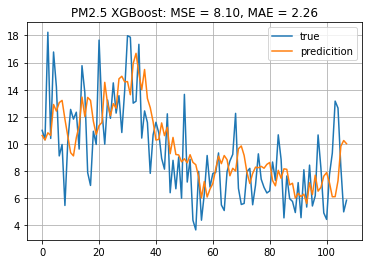

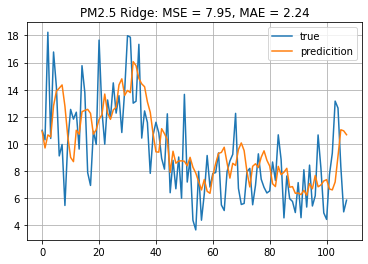

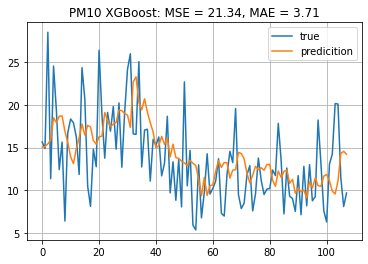

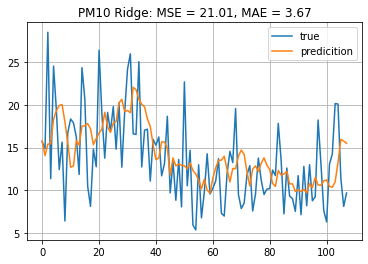

/home/rwanner/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


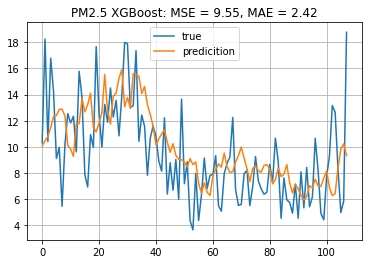

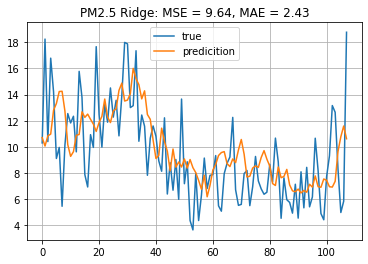

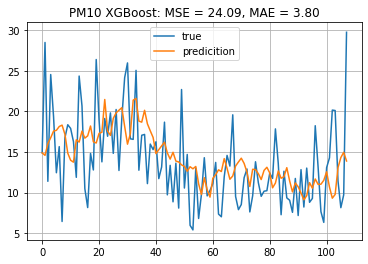

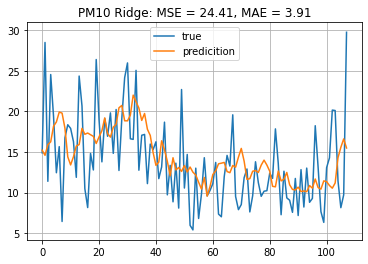

/home/rwanner/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


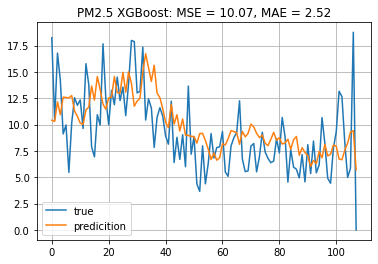

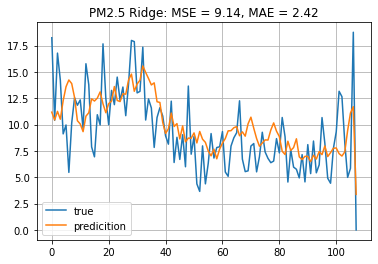

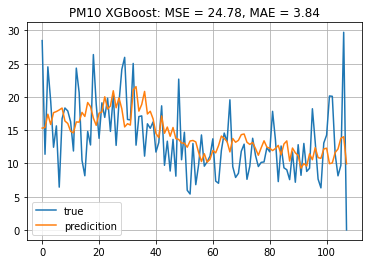

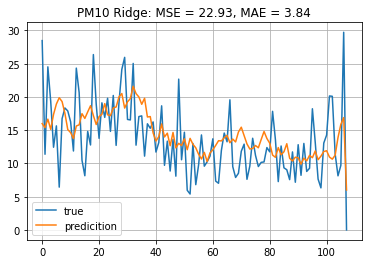

/home/rwanner/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


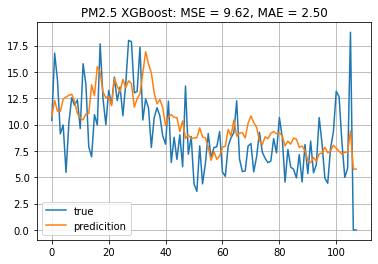

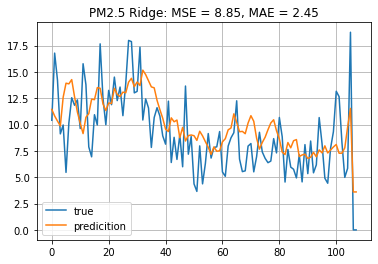

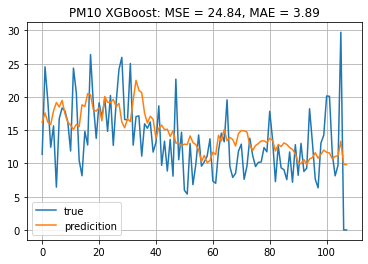

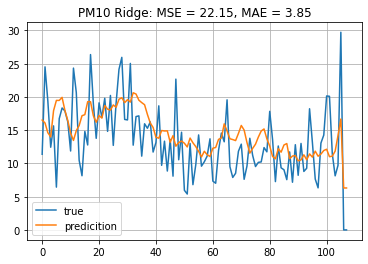

/home/rwanner/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


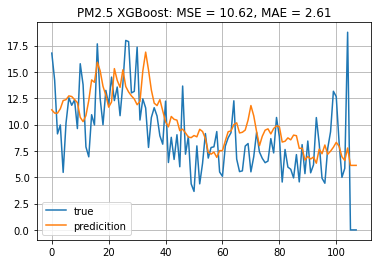

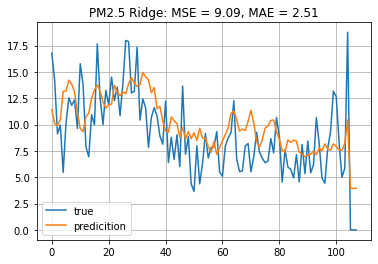

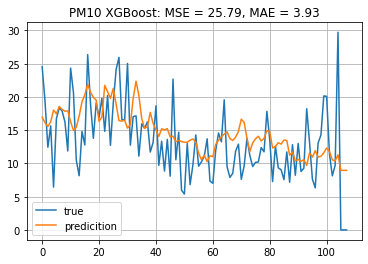

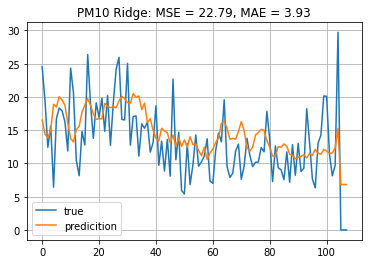

In [7]:
results_30m = []
for i in range(1, 7):
    #Fetch and prepare data
    s = '30min_' + str(i) + '.csv'
    data = pd.read_csv(s)
    data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
    data.dropna(inplace=True)
    data.reset_index(drop=True, inplace=True)
    data = data.iloc[:2147,:]
    
    #Split data
    n = int(TRAIN_TEST_SPLIT*data.shape[0])

    X_train = data.iloc[:n,:]
    X_test = data.iloc[n:,:]

    y_train25 = X_train[labels[0]]
    y_train10 = X_train[labels[1]]

    y_true25 = X_test[labels[0]]
    y_true10 = X_test[labels[1]]

    X_train = X_train.drop(labels, axis=1)
    X_test = X_test.drop(labels, axis=1)
    
    #Define models
    xgb25 = XGBRegressor(colsample_bytree=0.5, learning_rate= 0.01, max_depth=2, n_estimators=500)
    xgb10 = XGBRegressor(colsample_bytree=0.5, learning_rate= 0.01, max_depth=3, n_estimators=500)
    
    ridge25 = Ridge(alpha=110)
    ridge10 = Ridge(alpha=150)
    
    #ts25 = TimeSeriesSVR(C=1.0, kernel="gak", n_jobs=-1)
    #ts10 = TimeSeriesSVR(C=1.0, kernel="gak", n_jobs=-1)
    
    #Train models
    xgb25.fit(X_train.values, y_train25)
    xgb10.fit(X_train.values, y_train10)
    
    ridge25.fit(X_train.values, y_train25)
    ridge10.fit(X_train.values, y_train10)

    #ts25.fit(np.array(X_train), y_train25)
    #ts10.fit(np.array(X_train), y_train25)
    
    #Perform predictions
    xgb_pred25 = xgb25.predict(X_test)
    xgb_pred10 = xgb10.predict(X_test)
    
    ridge_pred25 = ridge25.predict(X_test)
    ridge_pred10 = ridge10.predict(X_test)
    
    #ts_pred25 = ts25.predict(np.array(X_test))
    #ts_pred10 = ts10.predict(np.array(X_test))
    
    #Results
    xgb_mse25 = mean_squared_error(y_true25, xgb_pred25)
    xgb_mae25 = mean_absolute_error(y_true25, xgb_pred25)
    
    xgb_mse10 = mean_squared_error(y_true10, xgb_pred10)
    xgb_mae10 = mean_absolute_error(y_true10, xgb_pred10)
    
    ridge_mse25 = mean_squared_error(y_true25, ridge_pred25)
    ridge_mae25 = mean_absolute_error(y_true25, ridge_pred25)
    
    ridge_mse10 = mean_squared_error(y_true10, ridge_pred10)
    ridge_mae10 = mean_absolute_error(y_true10, ridge_pred10)
    
    #ts_mse25 = mean_squared_error(y_true25, ts_pred25)
    #ts_mae25 = mean_absolute_error(y_true25, ts_pred25)
    
    #ts_mse10 = mean_squared_error(y_true10, ts_pred10)
    #ts_mae10 = mean_absolute_error(y_true10, ts_pred10)
    
    results_30m.append([xgb_mse25, xgb_mae25, xgb_mse10, xgb_mae10, ridge_mse25, ridge_mae25, ridge_mse10, ridge_mae10])#, ts_mse25, ts_mae25, ts_mse10, ts_mae10])
    
    #Plot
    plt.plot(np.arange(len(y_true25)), y_true25, label='true')
    plt.plot(np.arange(len(xgb_pred25)), xgb_pred25, label='predicition')
    plt.title(f'PM2.5 XGBoost: MSE = {format(xgb_mse25,".2f")}, MAE = {format(xgb_mae25,".2f")}')
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.plot(np.arange(len(y_true25)), y_true25, label='true')
    plt.plot(np.arange(len(ridge_pred25)), ridge_pred25, label='predicition')
    plt.title(f'PM2.5 Ridge: MSE = {format(ridge_mse25,".2f")}, MAE = {format(ridge_mae25,".2f")}')
    plt.legend()
    plt.grid()
    plt.show()
    """
    plt.plot(np.arange(len(y_true25)), y_true25, label='true')
    plt.plot(np.arange(len(ts_pred25)), ts_pred25, label='predicition')
    plt.title(f'PM2.5 Tslearn: MSE = {format(ts_mse25,".2f")}, MAE = {format(ts_mae25,".2f")}')
    plt.legend()
    plt.grid()
    plt.show()
    """
    plt.plot(np.arange(len(y_true10)), y_true10, label='true')
    plt.plot(np.arange(len(xgb_pred10)), xgb_pred10, label='predicition')
    plt.title(f'PM10 XGBoost: MSE = {format(xgb_mse10,".2f")}, MAE = {format(xgb_mae10,".2f")}')
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.plot(np.arange(len(y_true10)), y_true10, label='true')
    plt.plot(np.arange(len(ridge_pred10)), ridge_pred10, label='predicition')
    plt.title(f'PM10 Ridge: MSE = {format(ridge_mse10,".2f")}, MAE = {format(ridge_mae10,".2f")}')
    plt.legend()
    plt.grid()
    plt.show()
    """
    plt.plot(np.arange(len(y_true10)), y_true10, label='true')
    plt.plot(np.arange(len(ts_pred10)), ts_pred10, label='predicition')
    plt.title(f'PM10 Tslearn: MSE = {format(ts_mse10,".2f")}, MAE = {format(ts_mae10,".2f")}')
    plt.legend()
    plt.grid()
    plt.show()
    """

In [9]:
header = ['XGB MSE 2.5', 'XGB MAE 2.5', 'XGB MSE 10', 'XGB MAE 10', 'Ridge MSE 2.5', 'Ridge MAE 2.5', 'Ridge MSE 10', 'Ridge MAE 10']#, 'Tslearn MSE 2.5', 'Tslearn MAE 2.5', 'Tslearn MSE 10', 'Tslearn MAE 10']
results_30m = pd.DataFrame(results_30m, columns=header)

/home/rwanner/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


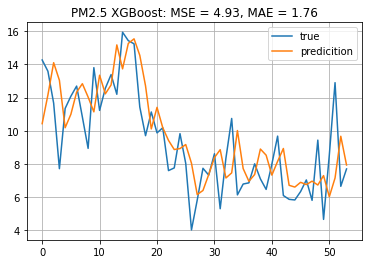

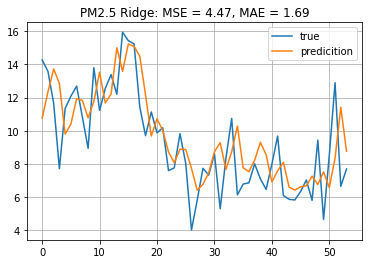

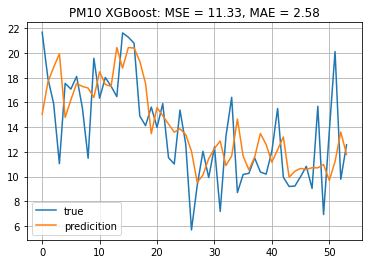

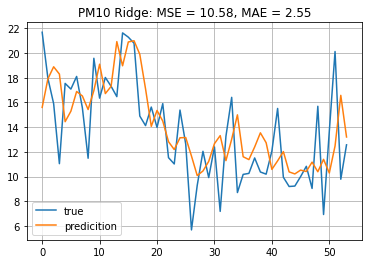

/home/rwanner/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


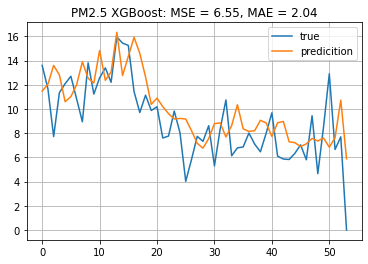

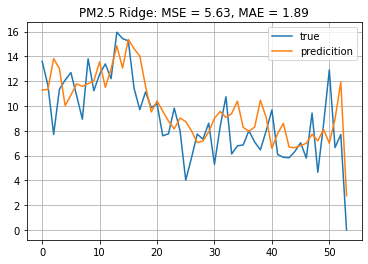

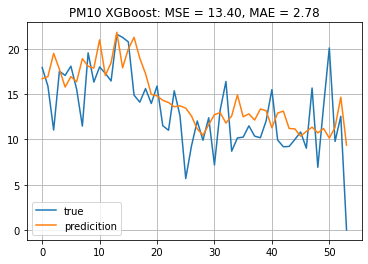

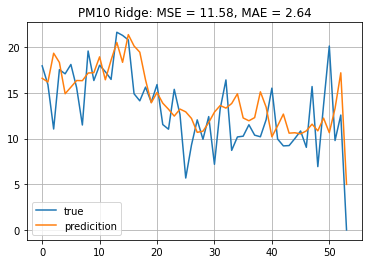

/home/rwanner/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


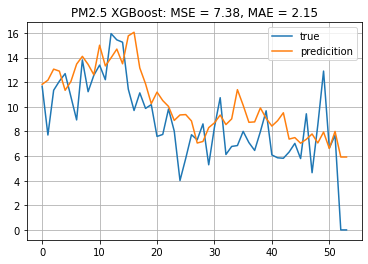

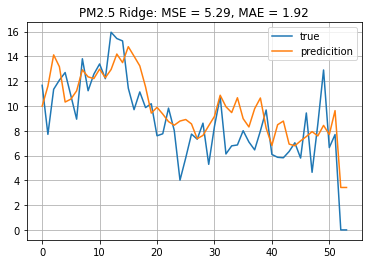

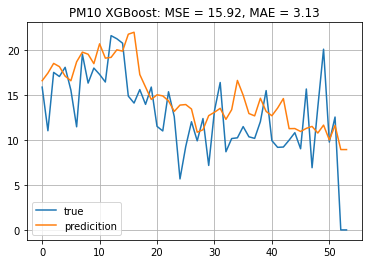

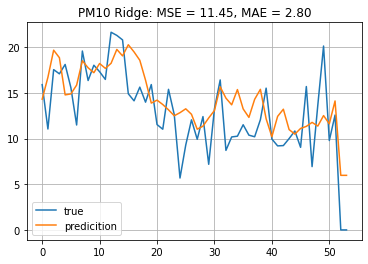

/home/rwanner/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


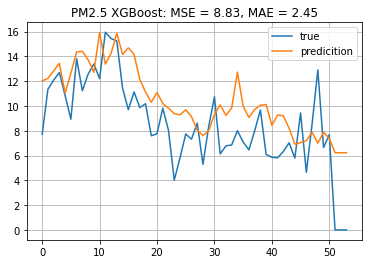

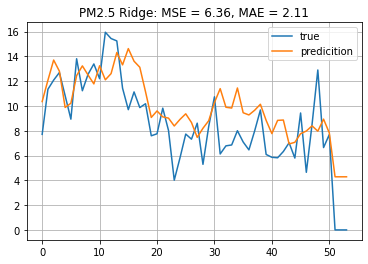

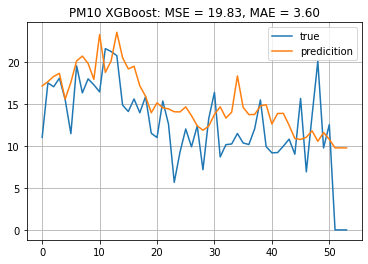

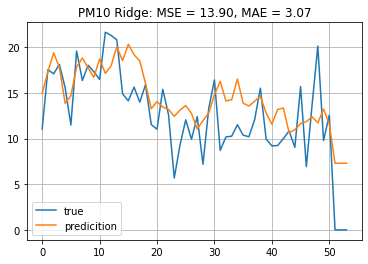

/home/rwanner/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


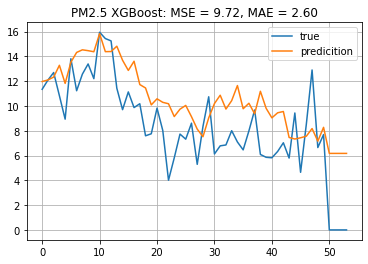

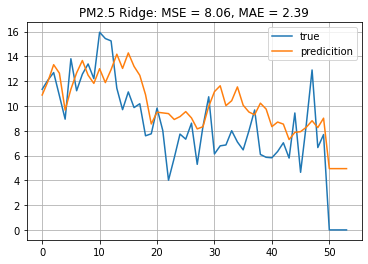

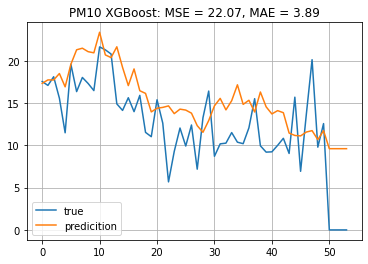

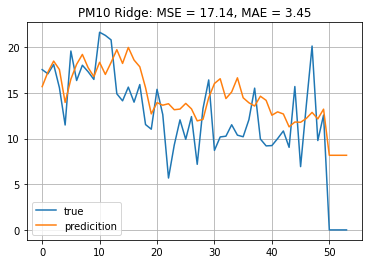

/home/rwanner/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


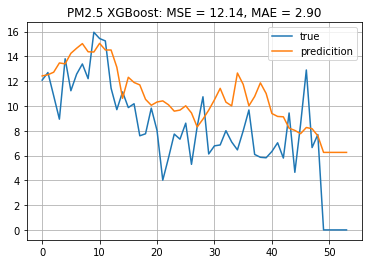

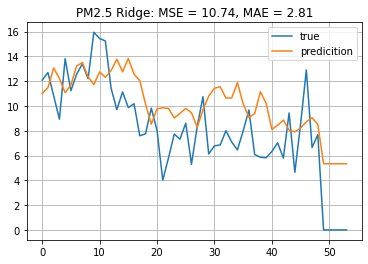

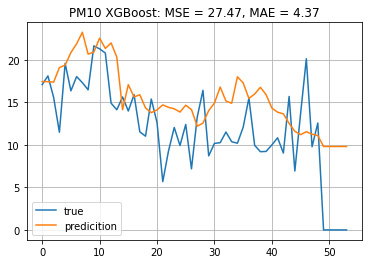

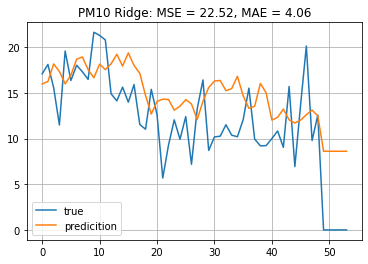

In [10]:
results_1h = []
for i in range(1, 7):
    #Fetch and prepare data
    s = '1h_' + str(i) + '.csv'
    data = pd.read_csv(s)
    data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
    data.dropna(inplace=True)
    data.reset_index(drop=True, inplace=True)
    data = data.iloc[:1074,:]
    
    #Split data
    n = int(TRAIN_TEST_SPLIT*data.shape[0])

    X_train = data.iloc[:n,:]
    X_test = data.iloc[n:,:]

    y_train25 = X_train[labels[0]]
    y_train10 = X_train[labels[1]]

    y_true25 = X_test[labels[0]]
    y_true10 = X_test[labels[1]]

    X_train = X_train.drop(labels, axis=1)
    X_test = X_test.drop(labels, axis=1)
    
    #Define models
    xgb25 = XGBRegressor(colsample_bytree=0.5, learning_rate= 0.01, max_depth=2, n_estimators=500)
    xgb10 = XGBRegressor(colsample_bytree=0.5, learning_rate= 0.01, max_depth=3, n_estimators=500)
    
    ridge25 = Ridge(alpha=110)
    ridge10 = Ridge(alpha=150)
    
    #ts25 = TimeSeriesSVR(C=1.0, kernel="gak", n_jobs=-1)
    #ts10 = TimeSeriesSVR(C=1.0, kernel="gak", n_jobs=-1)
    
    #Train models
    xgb25.fit(X_train.values, y_train25)
    xgb10.fit(X_train.values, y_train10)
    
    ridge25.fit(X_train.values, y_train25)
    ridge10.fit(X_train.values, y_train10)
    
    #ts25.fit(X_train.values, y_train25)
    #ts10.fit(X_train.values, y_train25)
    
    #Perform predictions
    xgb_pred25 = xgb25.predict(X_test)
    xgb_pred10 = xgb10.predict(X_test)
    
    ridge_pred25 = ridge25.predict(X_test)
    ridge_pred10 = ridge10.predict(X_test)
    
    #ts_pred25 = ts25.predict(X_test.values)
    #ts_pred10 = ts10.predict(X_test.values)
    
    #Results
    xgb_mse25 = mean_squared_error(y_true25, xgb_pred25)
    xgb_mae25 = mean_absolute_error(y_true25, xgb_pred25)
    
    xgb_mse10 = mean_squared_error(y_true10, xgb_pred10)
    xgb_mae10 = mean_absolute_error(y_true10, xgb_pred10)
    
    ridge_mse25 = mean_squared_error(y_true25, ridge_pred25)
    ridge_mae25 = mean_absolute_error(y_true25, ridge_pred25)
    
    ridge_mse10 = mean_squared_error(y_true10, ridge_pred10)
    ridge_mae10 = mean_absolute_error(y_true10, ridge_pred10)
    
    #ts_mse25 = mean_squared_error(y_true25, ts_pred25)
    #ts_mae25 = mean_absolute_error(y_true25, ts_pred25)
    
    #ts_mse10 = mean_squared_error(y_true10, ts_pred10)
    #ts_mae10 = mean_absolute_error(y_true10, ts_pred10)
    
    results_1h.append([xgb_mse25, xgb_mae25, xgb_mse10, xgb_mae10, ridge_mse25, ridge_mae25, ridge_mse10, ridge_mae10])#, ts_mse25, ts_mae25, ts_mse10, ts_mae10])
    
    #Plot
    plt.plot(np.arange(len(y_true25)), y_true25, label='true')
    plt.plot(np.arange(len(xgb_pred25)), xgb_pred25, label='predicition')
    plt.title(f'PM2.5 XGBoost: MSE = {format(xgb_mse25,".2f")}, MAE = {format(xgb_mae25,".2f")}')
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.plot(np.arange(len(y_true25)), y_true25, label='true')
    plt.plot(np.arange(len(ridge_pred25)), ridge_pred25, label='predicition')
    plt.title(f'PM2.5 Ridge: MSE = {format(ridge_mse25,".2f")}, MAE = {format(ridge_mae25,".2f")}')
    plt.legend()
    plt.grid()
    plt.show()
    """
    plt.plot(np.arange(len(y_true25)), y_true25, label='true')
    plt.plot(np.arange(len(ts_pred25)), ts_pred25, label='predicition')
    plt.title(f'PM2.5 Tslearn: MSE = {format(ts_mse25,".2f")}, MAE = {format(ts_mae25,".2f")}')
    plt.legend()
    plt.grid()
    plt.show()
    """
    plt.plot(np.arange(len(y_true10)), y_true10, label='true')
    plt.plot(np.arange(len(xgb_pred10)), xgb_pred10, label='predicition')
    plt.title(f'PM10 XGBoost: MSE = {format(xgb_mse10,".2f")}, MAE = {format(xgb_mae10,".2f")}')
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.plot(np.arange(len(y_true10)), y_true10, label='true')
    plt.plot(np.arange(len(ridge_pred10)), ridge_pred10, label='predicition')
    plt.title(f'PM10 Ridge: MSE = {format(ridge_mse10,".2f")}, MAE = {format(ridge_mae10,".2f")}')
    plt.legend()
    plt.grid()
    plt.show()
    """
    plt.plot(np.arange(len(y_true10)), y_true10, label='true')
    plt.plot(np.arange(len(ts_pred10)), ts_pred10, label='predicition')
    plt.title(f'PM10 Tslearn: MSE = {format(ts_mse10,".2f")}, MAE = {format(ts_mae10,".2f")}')
    plt.legend()
    plt.grid()
    plt.show()
    """

In [11]:
header = ['XGB MSE 2.5', 'XGB MAE 2.5', 'XGB MSE 10', 'XGB MAE 10', 'Ridge MSE 2.5', 'Ridge MAE 2.5', 'Ridge MSE 10', 'Ridge MAE 10']#, 'Tslearn MSE 2.5', 'Tslearn MAE 2.5', 'Tslearn MSE 10', 'Tslearn MAE 10']
results_1h = pd.DataFrame(results_1h, columns=header)

In [12]:
results_30m

,XGB MSE 2.5,XGB MAE 2.5,XGB MSE 10,XGB MAE 10,Ridge MSE 2.5,Ridge MAE 2.5,Ridge MSE 10,Ridge MAE 10
0,7.056712,2.170878,20.086334,3.648707,6.623748,2.114237,19.286252,3.561223
1,8.100313,2.258823,21.344811,3.707203,7.954327,2.239898,21.005710,3.670131
2,9.553829,2.415170,24.090599,3.800530,9.636615,2.432072,24.406388,3.912985
3,10.070816,2.522506,24.782061,3.836742,9.142095,2.417377,22.931054,3.839687
4,9.620094,2.495805,24.842253,3.885232,8.847072,2.450026,22.151777,3.846356
5,10.623586,2.611055,25.786625,3.926855,9.094582,2.509328,22.790624,3.925177


In [13]:
results_1h

,XGB MSE 2.5,XGB MAE 2.5,XGB MSE 10,XGB MAE 10,Ridge MSE 2.5,Ridge MAE 2.5,Ridge MSE 10,Ridge MAE 10
0,4.932389,1.756188,11.334491,2.581196,4.473133,1.685342,10.579254,2.545447
1,6.550774,2.036733,13.398870,2.783930,5.626925,1.886812,11.575575,2.635128
2,7.376889,2.151158,15.920040,3.132841,5.294377,1.916343,11.452151,2.803532
3,8.826198,2.452694,19.829179,3.597251,6.362279,2.111619,13.898667,3.071452
4,9.720834,2.601879,22.072626,3.893810,8.056243,2.388041,17.136349,3.451541
5,12.143745,2.897183,27.471544,4.367660,10.744036,2.805101,22.523455,4.063778


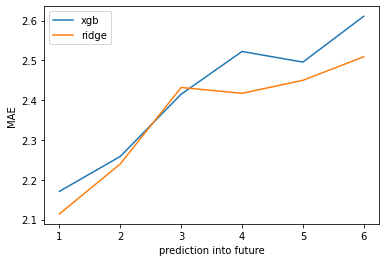

In [19]:
plt.plot(np.arange(1,7), results_30m['XGB MAE 2.5'], label='xgb')
plt.plot(np.arange(1,7), results_30m['Ridge MAE 2.5'], label='ridge')
#plt.plot(np.arange(1,7), results_30m['Tslearn MAE 2.5'], label='tslearn')
plt.xlabel("prediction into future")
plt.ylabel("MAE")
plt.legend()
plt.show()

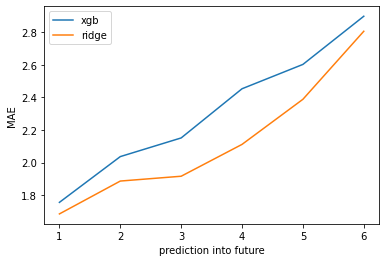

In [20]:
plt.plot(np.arange(1,7), results_1h['XGB MAE 2.5'], label='xgb')
plt.plot(np.arange(1,7), results_1h['Ridge MAE 2.5'], label='ridge')
#plt.plot(np.arange(1,7), results_1h['Tslearn MAE 2.5'], label='tslearn')
plt.xlabel("prediction into future")
plt.ylabel("MAE")
plt.legend()
plt.show()